# Short introduction to `numpy`

In [62]:
import numpy as np

# helper function to print title
def print_title(title):
    print('-'*len(title))
    print(title)
    print('-'*len(title))

## 1. Motivations

**Why `numpy`?** Because it's very well optimized (and then fast) for numerical computations in python

**Why python?** Many tools available


## 2. The core object: arrays

### 2.1 Main differences with usual python lists

Addition of lists/arrays and multiplication by a number:

In [63]:
l1, l2 = [1, 2, 3], [3, 4, 5]
a1, a2 = np.array([1, 2, 3]), np.array([3, 4, 5])

print_title('obj1+obj2')
print('  python lists: {}'.format(l1+l2))
print('  numpy arrays: {}'.format(a1+a2))
print('\n')
print_title('obj*2')
print('  python list: {}'.format(l1*2))
print('  numpy array: {}'.format(a1*2))

---------
obj1+obj2
---------
  python lists: [1, 2, 3, 3, 4, 5]
  numpy arrays: [4 6 8]


-----
obj*2
-----
  python list: [1, 2, 3, 1, 2, 3]
  numpy array: [2 4 6]


Slicing and indexing:

In [71]:
print_title('Indexing with an integer: obj[1]')
print('  python list: {}'.format(l1[1]))
print('  numpy array: {}'.format(a1[1]))
print('\n')

print_title('Indexing with a slicing: obj[slice(1,3))]')
print('  python list: {}'.format(l1[slice(1,3)]))
print('  numpy array: {}'.format(list1[slice(1,3)]))
print('\n')

print_title('Indexing with a list of integers: obj[[0,2]]')
print('  python list: IMPOSSIBLE')
print('  numpy array: {}'.format(a1[[0,2]]))

--------------------------------
Indexing with an integer: obj[1]
--------------------------------
  python list: 2
  numpy array: 2


-----------------------------------------
Indexing with a slicing: obj[slice(1,3))]
-----------------------------------------
  python list: [2, 3]
  numpy array: [2 3]


--------------------------------------------
Indexing with a list of integers: obj[[0,2]]
--------------------------------------------
  python list: IMPOSSIBLE
  numpy array: [1 3]


### 2.2 Main caracteristics of a `np.array`

  + `a.dtype`: type of data contained in the array
  + `a.shape`: number of elements along each dimension
  + `a.size`: total number of elements
  + `a.ndim`: number of dimensions

In [95]:
a = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])

print('a.dtype = {}'.format(a.dtype))
print('a.shape = {}'.format(a.shape))
print('a.size  = {}'.format(a.size))
print('a.ndim  = {}'.format(a.ndim))

a.dtype = int64
a.shape = (3, 4)
a.size  = 12
a.ndim  = 2


## 3. The three key features of `numpy`

### 3.1 Vectorization

The *Vectorization* is a way to make computations on numpy array **without explicit loops**, which are very slow in python. The idea of vectorization is to compute a given operation *element-wise* while the operation is called on the array itself. An example is given below to compute the inverse of 100000 numbers, both with explicit loop and vectorization.

In [133]:
a = np.random.randint(low=1, high=100, size=100000)

def explicit_loop_for_inverse(a):
    inv_a = np.empty(a.shape)
    for element in a:
        inv_a.append(1./element)
    return inv_a

In [134]:
# Using explicit loop
%timeit loop_for_inverse(a)

159 ms ± 3.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [135]:
# Using vectorization
%timeit 1.0/a

106 µs ± 307 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Many standard functions are implemented in a vectorized way, they are call the *universal functions*, or `ufunc`. Few examples are given below but the full description can be found in [numpy documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html).

In [136]:
a = np.random.randint(low=1, high=100, size=3)
print('a        : {}'.format(a))
print('a^2      : {}'.format(a**2))
print('a/(1-a^a): {}'.format(a/(1-a**a)))
print('cos(a)   : {}'.format(np.cos(a)))
print('exp(a)   : {}'.format(np.exp(a)))

a        : [81 85 97]
a^2      : [6561 7225 9409]
a/(1-a^a): [ 2.48125680e-17 -2.24142674e-17 -2.11167384e-17]
cos(a)   : [ 0.77668598 -0.98437664 -0.92514754]
exp(a)   : [1.50609731e+35 8.22301271e+36 1.33833472e+42]


### 3.2 Broadcasting

The *broadcasting* is a way to compute operation between arrays of having different sizes in a implicit (and consice) manner. Few examples are given below but more details are give in [this documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html).

In [149]:
# operation between shape (3) and (1)
a = np.array([1, 2, 3])
b = np.array([5])
a+b

array([6, 7, 8])

In [150]:
# operation between shape (3) and (1,2)
a = np.array([1, 2, 3])
b = np.array([
              [4],
              [5],
             ])
a+b

array([[5, 6, 7],
       [6, 7, 8]])

In [206]:
# Operation between shapes (5,3) and (3), e.g. adding an origin r0 to 10 2D vectors
data = np.random.normal(size=(5, 2))
r0 = np.array([1, 4])
print('before translation:\n {}\n'.format(data))
print('after translation :\n {}'.format(data+r0))

before translation:
 [[-1.1780008  -2.01460774]
 [ 1.42342377  0.88062726]
 [ 0.47789735 -0.55238917]
 [ 0.22707783  0.28795655]
 [-0.44570835  0.10793388]]

after translation :
 [[-0.1780008   1.98539226]
 [ 2.42342377  4.88062726]
 [ 1.47789735  3.44761083]
 [ 1.22707783  4.28795655]
 [ 0.55429165  4.10793388]]


### 3.3 Slicing and indexing

## 4. Plotting tool `matplotlib`

In [204]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

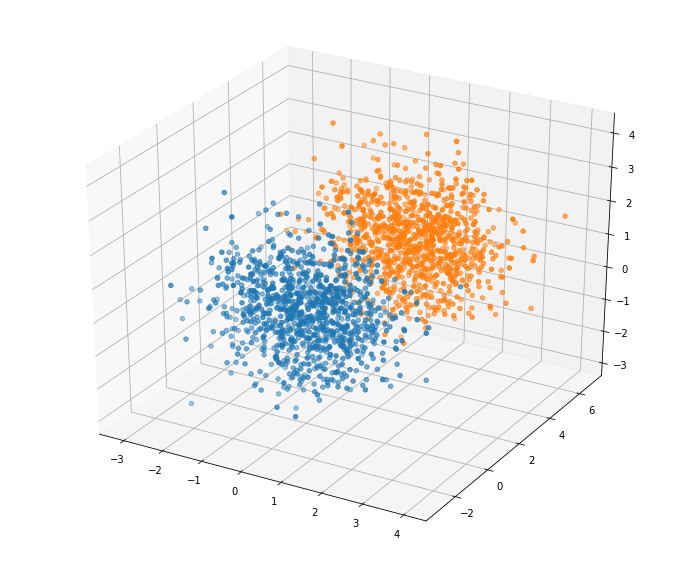

In [205]:
data = np.random.normal(size=(1000, 3))
r0 = np.array([1, 4, 1])
data_trans = data + r0

x, y, z = data[:,0], data[:,1], data[:,2]
x_trans, y_trans, z_trans = data_trans[:,0], data_trans[:,1], data_trans[:,2]
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
_ = ax.scatter3D(x, y, z)
_ = ax.scatter(x_trans, y_trans, z_trans)